# Analyzing Portfolio Risk and Return

This platform aims to offer clients a one-stop online investment solution for their retirement portfolios that’s both inexpensive and high quality. (Think about [Wealthfront](https://www.wealthfront.com/) or [Betterment](https://www.betterment.com/)). To keep the costs low, the firm uses algorithms to build each client's portfolio. The algorithms choose from various investment styles and risk tolerance.

We seek the fund with the most investment potential based on key risk-management metrics: the daily returns, standard deviations, Sharpe ratios, and betas.

### Import the Data

1. Import the required libraries and dependencies.

2. The `read_csv` function and the `Path` module to reads the `whale_navs.csv` file into a Pandas DataFrame. We create a `DateTimeIndex` and review the first five rows of the DataFrame by using the `head` function.

3. Using the Pandas `pct_change` function together with `dropna` function, we create the daily returns DataFrame. This DataFrame is based on the NAV prices of the four portfolios and on the closing price of the S&P 500 Index.

### Analyze the Performance

Analyze the data to determine if any of the portfolios outperform the broader stock market, which the S&P 500 represents.

1. The default Pandas `plot` function helps us visualize the daily return data of the four fund portfolios and the S&P 500.

2. The Pandas `cumprod` function calculates the cumulative returns for the four fund portfolios and the S&P 500. 

3. `plot` to visualize the cumulative return values for the four funds and the S&P 500 over time. 


### Analyze the Volatility

Analyze the volatility of each of the four fund portfolios and of the S&P 500 Index by using box plots. To do so, we:

1. Use the Pandas `plot` function and the `kind="box"` parameter to visualize the daily return data for each of the four portfolios and for the S&P 500 in a box plot.

2. Use the Pandas `drop` function to create a new DataFrame that contains the data for just the four fund portfolios by dropping the S&P 500 column. Visualize the daily return data for just the four fund portfolios by using another box plot.


### Analyze the Risk

Evaluate the risk profile of each portfolio by using the standard deviation and the beta.

1. Use the Pandas `std` function to calculate the standard deviation for each of the four portfolios and for the S&P 500. Review the standard deviation calculations, sorted from smallest to largest.

2. Calculate the annualized standard deviation for each of the four portfolios and for the S&P 500. To do that, multiply the standard deviation by the square root of the number of trading days. (Using 252 trading days/year)

3. Use the daily returns DataFrame and a 21-day rolling window to plot the rolling standard deviations of the four fund portfolios and of the S&P 500 index. 

4. Use the daily returns DataFrame and a 21-day rolling window to plot the rolling standard deviations of only the four fund portfolios. 


### Analyze the Risk-Return Profile

We compare the risk-return of each portfolios by calculating their respective Sharpe ratios. 

1. Use the daily return DataFrame to calculate the annualized average return data for the four fund portfolios and for the S&P 500. Use 252 for the number of trading days. Review the annualized average returns, sorted from lowest to highest.

2. Calculate the Sharpe ratios for the four fund portfolios and for the S&P 500. To do that, divide the annualized average return by the annualized standard deviation for each. 

3. Visualize the Sharpe ratios for the four funds and for the S&P 500 in a bar chart.


#### Diversify the Portfolio

Recommendation

1. Using the 60-day rolling window, the daily return data, and the S&P 500 returns, calculate the covariance. 

2. Calculate the beta of the portfolio. To do that, divide the covariance of the portfolio by the variance of the S&P 500.

3. Use the Pandas `mean` function to calculate the average value of the 60-day rolling beta of the portfolio.

4. Plot the 60-day rolling beta. 


### Import the Data

#### Step 1: Import the required libraries and dependencies.

In [1]:
# Import the required libraries and dependencies

import pandas as pd
from pathlib import Path
import numpy as np
%matplotlib inline

#### Step 2: Use the `read_csv` function and the `Path` module to read the `whale_navs.csv` file into a Pandas DataFrame. Be sure to create a `DateTimeIndex`. Review the first five rows of the DataFrame by using the `head` function.

In [2]:
# Import the data by reading in the CSV file and setting the DatetimeIndex 

portfolio_df = pd.read_csv(
    Path("Resources/whale_navs.csv"),
    index_col="date",
    parse_dates=True,
    infer_datetime_format=True
)

portfolio_df.head()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
date,,,,,
2014-10-01,31.950240,14.991826,59.977830,51.948712,194.35
2014-10-02,31.936110,14.994072,59.978626,51.957619,194.38
2014-10-03,31.969707,14.999596,60.002264,52.022484,196.52
2014-10-06,32.048215,14.999471,60.006244,52.036387,196.29
2014-10-07,31.964216,14.994720,59.993735,52.005864,193.26


#### Step 3: Use the Pandas `pct_change` function together with `dropna` to create the daily returns DataFrame. Base this DataFrame on the NAV prices of the four portfolios and on the closing price of the S&P 500 Index. Review the first five rows of the daily returns DataFrame.

In [3]:
# Prepare for the analysis by converting the dataframe of NAVs and prices to daily returns

portfolio_daily_returns = portfolio_df.pct_change().dropna()

portfolio_daily_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
date,,,,,
2014-10-02,-0.000442,0.000150,0.000013,0.000171,0.000154
2014-10-03,0.001052,0.000368,0.000394,0.001248,0.011009
2014-10-06,0.002456,-0.000008,0.000066,0.000267,-0.001170
2014-10-07,-0.002621,-0.000317,-0.000208,-0.000587,-0.015436
2014-10-08,0.000390,0.000369,0.000242,0.000842,0.017489


---

## Quantitative Analysis

The analysis has several components: performance, volatility, risk, risk-return profile, and portfolio diversification. You’ll analyze each component one at a time.

###  Analyze the Performance

Analyze the data to determine if any of the portfolios outperform the broader stock market, which the S&P 500 represents.

#### Step 1:  Use the default Pandas `plot` function to visualize the daily return data of the four fund portfolios and the S&P 500. Be sure to include the `title` parameter, and adjust the figure size if necessary.

<AxesSubplot:title={'center':'Daily Returns'}, xlabel='date'>

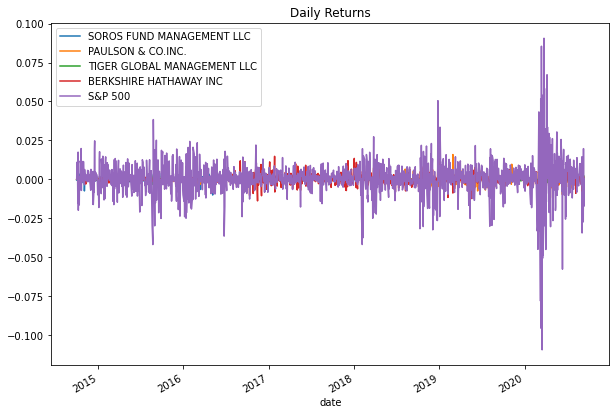

In [4]:
# Plot the daily return data of the 4 funds and the S&P 500 

portfolio_daily_returns.plot(figsize=(10,7),title="Daily Returns")

#### Step 2: Use the Pandas `cumprod` function to calculate the cumulative returns for the four fund portfolios and the S&P 500. Review the last five rows of the cumulative returns DataFrame by using the Pandas `tail` function.

In [5]:
# Calculate and plot the cumulative returns of the 4 fund portfolios and the S&P 500

portfolio_cumulative_returns = (1 + portfolio_daily_returns).cumprod()
portfolio_cumulative_returns.tail()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
date,,,,,
2020-09-04,0.987355,0.958187,1.055714,1.244856,1.762645
2020-09-08,0.985640,0.956378,1.054373,1.238608,1.714484
2020-09-09,0.986739,0.958409,1.057221,1.240858,1.748341
2020-09-10,0.985498,0.959740,1.055539,1.237883,1.717983
2020-09-11,0.985086,0.957887,1.055081,1.236625,1.718858


#### Step 3: Use the default Pandas `plot` to visualize the cumulative return values for the four funds and the S&P 500 over time. Be sure to include the `title` parameter, and adjust the figure size if necessary.

<AxesSubplot:title={'center':'Cumulative Returns'}, xlabel='date'>

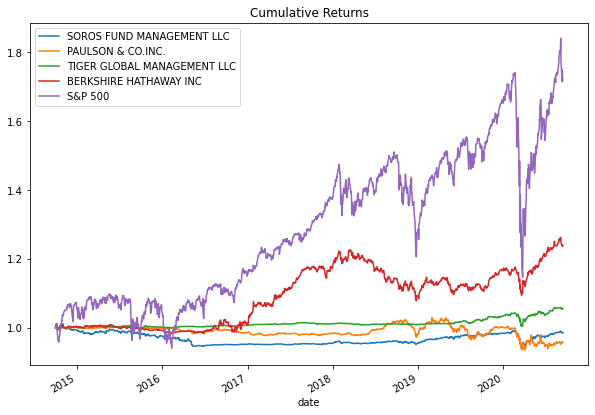

In [6]:
# Visualize the cumulative returns using the Pandas plot function

portfolio_cumulative_returns.plot(figsize=(10,7),title="Cumulative Returns")

**Analysis** 
With the exception of a few times early in the data set, the S&P 500 has consistently outperformed the other fund portfolios. 

---

### Analyze the Volatility

Analyze the volatility of each of the four fund portfolios and of the S&P 500 Index by using box plots.

#### Step 1: Use the Pandas `plot` function and the `kind="box"` parameter to visualize the daily return data for each of the four portfolios and for the S&P 500 in a box plot. Be sure to include the `title` parameter, and adjust the figure size if necessary.

<AxesSubplot:title={'center':'Daily Returns'}>

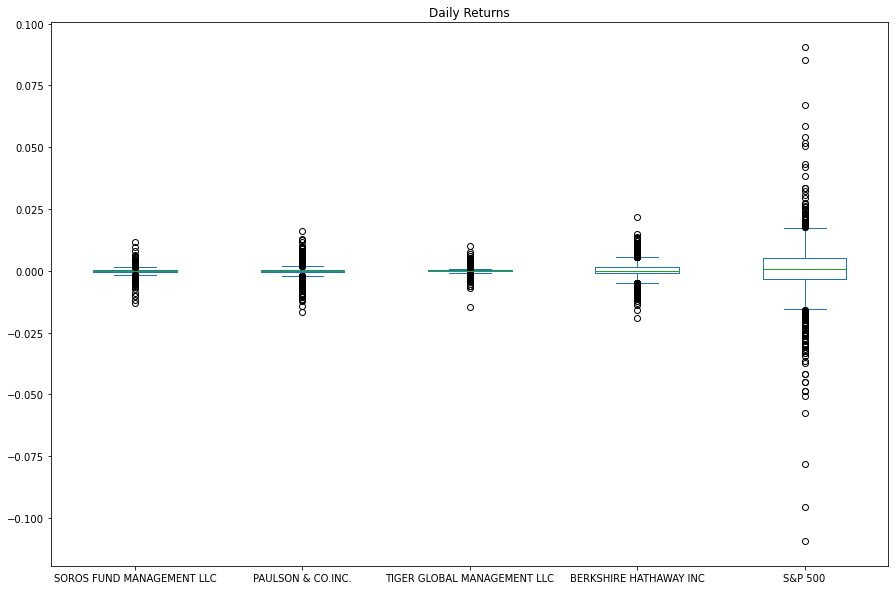

In [7]:
# Use the daily return data to create box plots to visualize the volatility of the 4 funds and the S&P 500 

portfolio_daily_returns.plot(kind="box", title="Daily Returns", figsize=(15,10))

#### Step 2: Use the Pandas `drop` function to create a new DataFrame that contains the data for just the four fund portfolios by dropping the S&P 500 column. Visualize the daily return data for just the four fund portfolios by using another box plot. Be sure to include the `title` parameter, and adjust the figure size if necessary.

<AxesSubplot:title={'center':'Portfolio Performance'}>

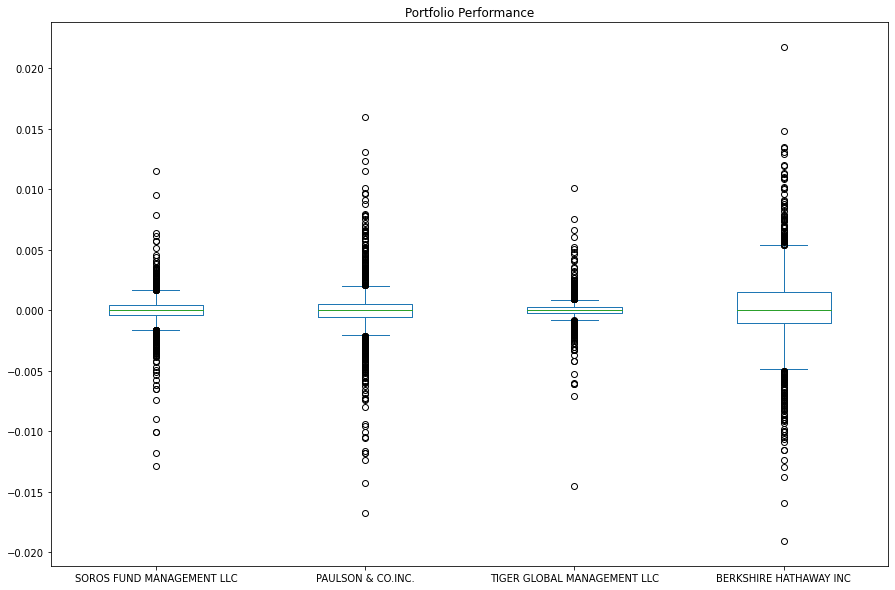

In [8]:
# Create a new DataFrame containing only the 4 fund portfolios by dropping the S&P 500 column from the DataFrame
# Create box plots to reflect the return data for only the 4 fund portfolios

portfolio_sans_500_df = portfolio_df.drop(columns=["S&P 500"])
portfolio_sans_500_daily_return=portfolio_sans_500_df.pct_change().dropna()
portfolio_sans_500_daily_return.plot(kind="box",figsize=(15,10),title="Portfolio Performance")

---

### Analyze the Risk

Evaluate the risk profile of each portfolio by using the standard deviation and the beta.

#### Step 1: Use the Pandas `std` function to calculate the standard deviation for each of the four portfolios and for the S&P 500. Review the standard deviation calculations, sorted from smallest to largest.

In [9]:
# Calculate and sort the standard deviation for all 4 portfolios and the S&P 500
# Review the standard deviations sorted smallest to largest

portfolio_daily_return = portfolio_df.pct_change().dropna()
portfolio_daily_return.std().sort_values()

TIGER GLOBAL MANAGEMENT LLC    0.000996
SOROS FUND MANAGEMENT LLC      0.001405
PAULSON & CO.INC.              0.002199
BERKSHIRE HATHAWAY INC         0.003256
S&P 500                        0.011550
dtype: float64

#### Step 2: Calculate the annualized standard deviation for each of the four portfolios and for the S&P 500. To do that, multiply the standard deviation by the square root of the number of trading days. Use 252 for that number.

In [10]:
# Calculate and sort the annualized standard deviation (252 trading days) of the 4 portfolios and the S&P 500
# Review the annual standard deviations smallest to largest

trading_days = 252
annual_portfolio_sd = portfolio_daily_return.std() * np.sqrt(trading_days)
annual_portfolio_sd.sort_values()


TIGER GLOBAL MANAGEMENT LLC    0.015804
SOROS FUND MANAGEMENT LLC      0.022297
PAULSON & CO.INC.              0.034912
BERKSHIRE HATHAWAY INC         0.051692
S&P 500                        0.183345
dtype: float64

#### Step 3: Use the daily returns DataFrame and a 21-day rolling window to plot the rolling standard deviations of the four fund portfolios and of the S&P 500 index. Be sure to include the `title` parameter, and adjust the figure size if necessary.

<AxesSubplot:title={'center':'Daily 21 Day Averages '}, xlabel='date'>

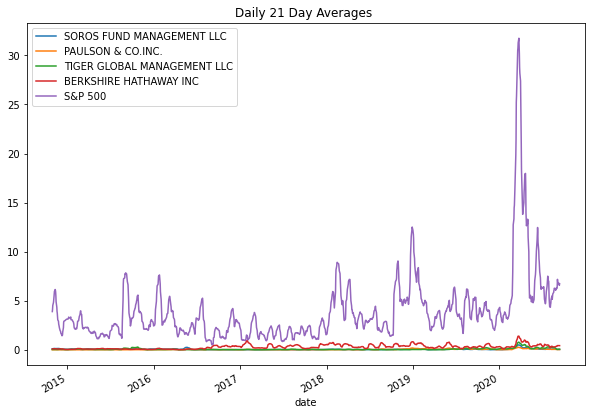

In [11]:
# Using the daily returns DataFrame and a 21-day rolling window, 
# plot the rolling standard deviation of the 4 portfolios and the S&P 500

portfolio_21 = portfolio_df.rolling(window=21).std()
portfolio_21.plot(figsize=(10,7), title = "Daily 21 Day Averages ")

#### Step 4: Use the daily returns DataFrame and a 21-day rolling window to plot the rolling standard deviations of only the four fund portfolios. Be sure to include the `title` parameter, and adjust the figure size if necessary.

<AxesSubplot:title={'center':'Daily 21 Day Averages '}, xlabel='date'>

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
count,1478.000000,1478.000000,1478.000000,1478.000000
mean,0.055266,0.041314,0.070559,0.302340
std,0.058358,0.043930,0.096997,0.222112
min,0.006701,0.002883,0.005562,0.015995
25%,0.021015,0.012083,0.022767,0.105414
50%,0.042225,0.021849,0.036445,0.270062
75%,0.067145,0.056130,0.067173,0.425227
max,0.508833,0.258512,0.782754,1.393922


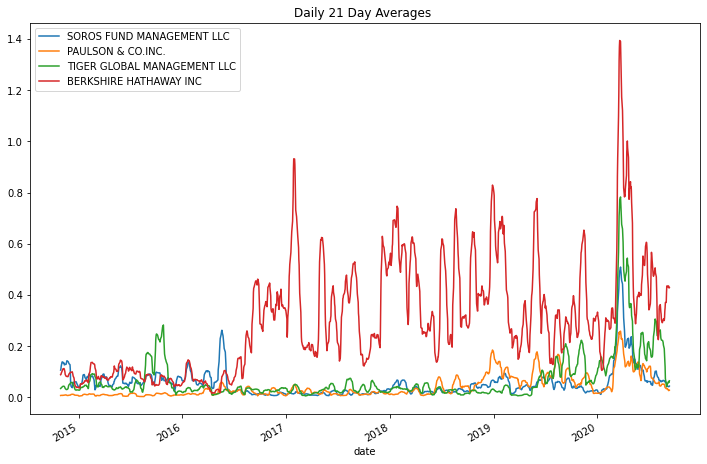

In [12]:
# Using the daily return data and a 21-day rolling window, plot the rolling standard deviation of just the 4 portfolios. 

portfolio_sans_500_21 = portfolio_sans_500_df.rolling(window=21).std()
display(portfolio_sans_500_21.plot(figsize=(12,8), title = "Daily 21 Day Averages "))
display(portfolio_sans_500_21.describe())

---

### Analyze the Risk-Return Profile

To determine the overall risk of an asset or portfolio, quantitative analysts and investment managers consider not only its risk metrics but also its risk-return profile. After all, if you have two portfolios that each offer a 10% return but one has less risk, you’d probably invest in the smaller-risk portfolio. For this reason, you need to consider the Sharpe ratios for each portfolio.

#### Step 1: Use the daily return DataFrame to calculate the annualized average return data for the four fund portfolios and for the S&P 500. Use 252 for the number of trading days. Review the annualized average returns, sorted from lowest to highest.

In [13]:
# Calculate the annual average return data for the for fund portfolios and the S&P 500
# Use 252 as the number of trading days in the year
# Review the annual average returns sorted from lowest to highest

annual_average_return_portfolio = portfolio_daily_returns.mean() * trading_days
annual_average_return_portfolio.sort_values()

PAULSON & CO.INC.             -0.006633
SOROS FUND MANAGEMENT LLC     -0.002281
TIGER GLOBAL MANAGEMENT LLC    0.009151
BERKSHIRE HATHAWAY INC         0.037090
S&P 500                        0.108102
dtype: float64

#### Step 2: Calculate the Sharpe ratios for the four fund portfolios and for the S&P 500. To do that, divide the annualized average return by the annualized standard deviation for each. Review the resulting Sharpe ratios, sorted from lowest to highest.

In [14]:
# Calculate the annualized Sharpe Ratios for each of the 4 portfolios and the S&P 500.
# Review the Sharpe ratios sorted lowest to highest

annual_average_std_dev_portfolio = portfolio_daily_returns.std() * np.sqrt(trading_days)
portfolio_sharpe = annual_average_return_portfolio / annual_average_std_dev_portfolio
portfolio_sharpe.sort_values()

PAULSON & CO.INC.             -0.189998
SOROS FUND MANAGEMENT LLC     -0.102290
TIGER GLOBAL MANAGEMENT LLC    0.579002
S&P 500                        0.589612
BERKSHIRE HATHAWAY INC         0.717512
dtype: float64

#### Step 3: Visualize the Sharpe ratios for the four funds and for the S&P 500 in a bar chart. Be sure to include the `title` parameter, and adjust the figure size if necessary.

<AxesSubplot:title={'center':'Sharpe Ratios'}>

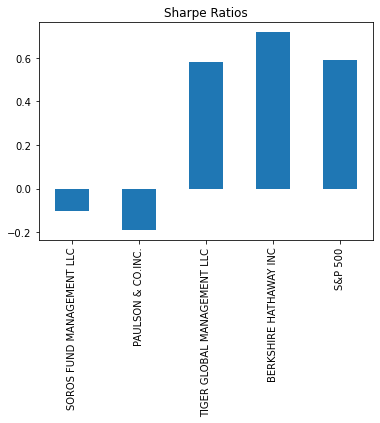

In [15]:
# Visualize the Sharpe ratios as a bar chart
# Include a title parameter and adjust the figure size

portfolio_sharpe.plot.bar(title="Sharpe Ratios")

---

### Diversify the Portfolio

#### Use the Pandas `var` function to calculate the variance of the S&P 500 by using a 60-day rolling window. Visualize the last five rows of the variance of the S&P 500.

date
2020-09-04    0.000103
2020-09-08    0.000116
2020-09-09    0.000120
2020-09-10    0.000121
2020-09-11    0.000120
Name: S&P 500, dtype: float64

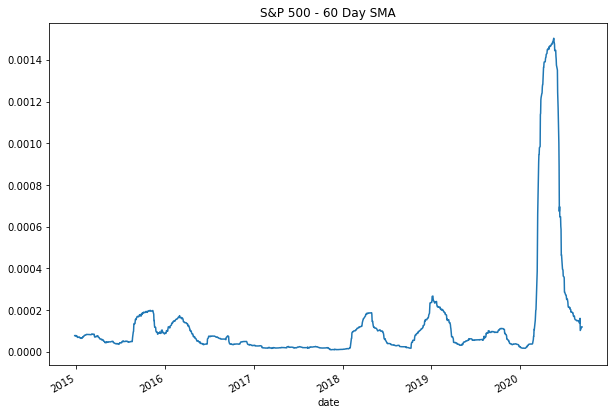

In [16]:
# Calculate the variance of the S&P 500 using a rolling 60-day window.

sp_500_df= portfolio_daily_returns['S&P 500']
sp_500_var = sp_500_df.rolling(window=60).var()

sp_500_var.plot(figsize=(10,7), title="S&P 500 - 60 Day SMA")
display(sp_500_var.tail())

1. Using the 60-day rolling window, the daily return data, and the S&P 500 returns, we calculate covariance to ensure accurate analysis. 

2. Calculate the beta of the portfolio. To do that, divide the covariance of the portfolio by the variance of the S&P 500.

3. Use the Pandas `mean` function to calculate the average value of the 60-day rolling beta of the portfolio.

4. Plot the 60-day rolling beta.

##### Portfolio 1 - Step 1: Using the 60-day rolling window, the daily return data, and the S&P 500 returns, calculate the covariance. Review the last five rows of the covariance of the portfolio.

In [17]:
# Calculate the covariance using a 60-day rolling window 

tiger_df = portfolio_daily_returns["TIGER GLOBAL MANAGEMENT LLC"]
tiger_cov=tiger_df.rolling(window=60).cov(sp_500_df)

# Display the covariance

tiger_cov.tail()

date
2020-09-04    0.000008
2020-09-08    0.000009
2020-09-09    0.000010
2020-09-10    0.000010
2020-09-11    0.000010
dtype: float64

##### Portfolio 1 - Step 2: Calculate the beta of the portfolio. To do that, divide the covariance of the portfolio by the variance of the S&P 500.

In [18]:
# Calculate the beta based on the 60-day rolling covariance compared to the market (S&P 500)

tiger_rolling_60_beta = tiger_cov / sp_500_var
display(tiger_rolling_60_beta)

date
2014-10-02         NaN
2014-10-03         NaN
2014-10-06         NaN
2014-10-07         NaN
2014-10-08         NaN
                ...   
2020-09-04    0.081061
2020-09-08    0.076672
2020-09-09    0.079575
2020-09-10    0.080934
2020-09-11    0.081378
Length: 1497, dtype: float64

##### Portfolio 1 - Step 3: Use the Pandas `mean` function to calculate the average value of the 60-day rolling beta of the portfolio.

In [19]:
# Calculate the average of the 60-day rolling beta

tiger_60_beta_mean = tiger_rolling_60_beta.mean()
display(tiger_60_beta_mean)

0.03093001487238774

##### Portfolio 1 - Step 4: Plot the 60-day rolling beta. Be sure to include the `title` parameter, and adjust the figure size if necessary.

<AxesSubplot:title={'center':'Tiger- 60 Day Rolling Beta'}, xlabel='date'>

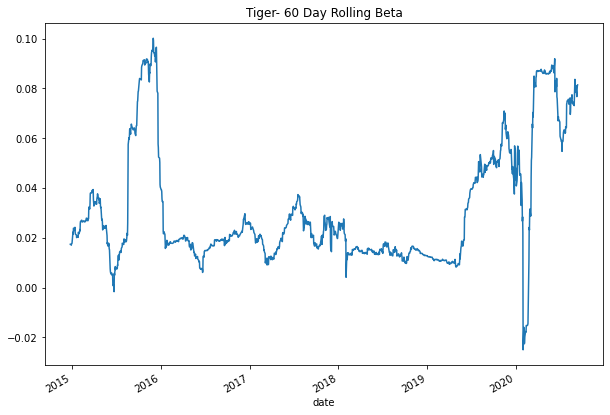

In [20]:
# Plot the rolling beta 

tiger_rolling_60_beta.plot(figsize=(10,7), title="Tiger- 60 Day Rolling Beta")

##### Portfolio 2 - Step 1: Using the 60-day rolling window, the daily return data, and the S&P 500 returns, calculate the covariance. Review the last five rows of the covariance of the portfolio.

In [21]:
# Calculate the covariance using a 60-day rolling window 

berkshire_df = portfolio_daily_returns["BERKSHIRE HATHAWAY INC"]

berkshire_cov = berkshire_df.rolling(window=60).cov(sp_500_df)

# Display the covariance
berkshire_cov.tail()

date
2020-09-04    0.000021
2020-09-08    0.000023
2020-09-09    0.000024
2020-09-10    0.000024
2020-09-11    0.000024
dtype: float64

##### Portfolio 2 - Step 2: Calculate the beta of the portfolio. To do that, divide the covariance of the portfolio by the variance of the S&P 500.

In [22]:
# Calculate the beta based on the 60-day rolling covariance compared to the market (S&P 500)

berkshire_rolling_60_beta = berkshire_cov / sp_500_var

##### Portfolio 2 - Step 3: Use the Pandas `mean` function to calculate the average value of the 60-day rolling beta of the portfolio.

In [23]:
# Calculate the average of the 60-day rolling beta

berkshire_60_beta_mean = berkshire_rolling_60_beta.mean()

##### Portfolio 2 - Step 4: Plot the 60-day rolling beta. Be sure to include the `title` parameter, and adjust the figure size if necessary.

<AxesSubplot:title={'center':'Berkshire Hathaway- 60 Day Rolling Beta'}, xlabel='date'>

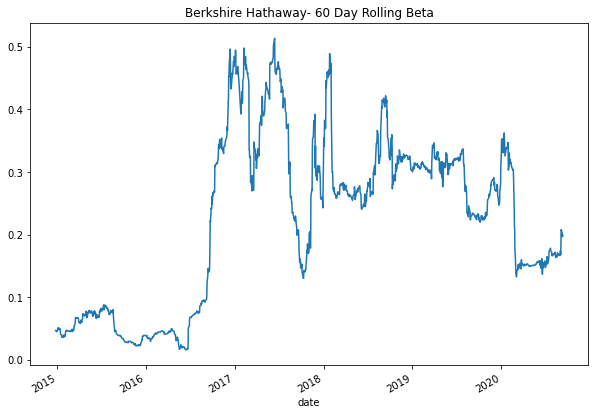

In [24]:
# Plot the rolling beta 

berkshire_rolling_60_beta.plot(figsize=(10,7), title="Berkshire Hathaway- 60 Day Rolling Beta")

#### ANALYSIS:

1. Lorem Ipsum

**Question 1** Lorem Ipsum
    
**Answer 1** lorem Ipsum